## Linear Regression - Exercise 01
## Objective: Predict the time to accomplish an specific distance.
## by Luis Urso
## USP/ESALQ Data Science, MBA

In [29]:
## Import Required Libraries for the whole script  

import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

Sample 1 - Time x Distance

In [30]:
## Read Tempodist Dataset

df = pd.read_csv("tempodist.csv", delimiter=',')

In [31]:
## View Dataset Structure & Fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tempo      18 non-null     int64
 1   distancia  18 non-null     int64
dtypes: int64(2)
memory usage: 420.0 bytes


In [32]:
## View Univariate Statistics 

df.describe()

,tempo,distancia
count,18.000000,18.000000
mean,30.000000,17.111111
std,13.222085,8.717048
min,10.000000,5.000000
25%,20.000000,8.750000
50%,27.500000,17.000000
75%,35.000000,23.000000
max,55.000000,32.000000


<function matplotlib.pyplot.show(close=None, block=None)>

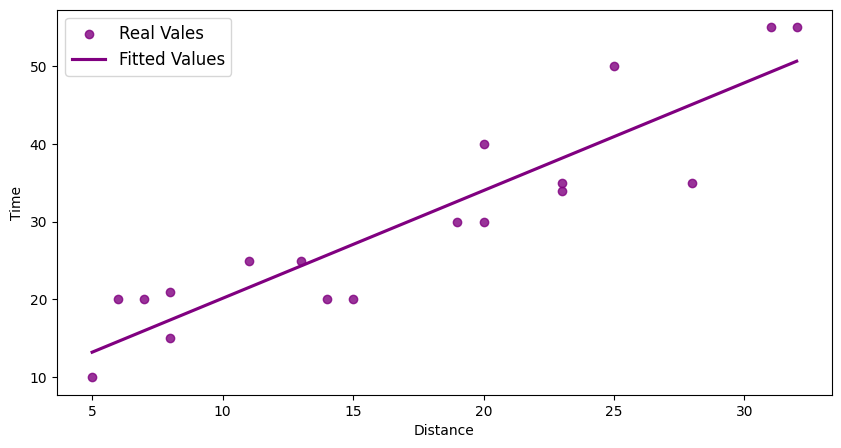

In [33]:
# Linear Regression using function 'sns.regplot'

plt.figure(figsize=(10,5))
sns.regplot(data=df, x='distancia', y='tempo', ci=False, color='purple')
plt.xlabel('Distance', fontsize=10)
plt.ylabel('Time', fontsize=10)
plt.legend(['Real Vales', 'Fitted Values'], fontsize=12)
plt.show

In [34]:
# Estimates an OLS Model

## Model Estimation (fit)

model = sm.OLS.from_formula("tempo ~ distancia", df).fit()

## Verify the estimation parameters 
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     80.73
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           1.19e-07
Time:                        10:44:29   Log-Likelihood:                -55.307
No. Observations:                  18   AIC:                             114.6
Df Residuals:                      16   BIC:                             116.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2894      2.945      2.136      0.048       0.047      12.532
distancia      1.3857      0.154      8.985      0.000       1.059       1.713
==============================================================================
Omnibus:                        1.571   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.914
Skew:                          -0.098   Prob(JB):                        0.633
Kurtosis:                       1.914   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Save fitted values (yhat) and residuals errors (errors) into the original dataset (add columns)

df['yhat'] = model.fittedvalues
df['errors'] = model.resid
df

,tempo,distancia,yhat,errors
0,15,8,17.374849,-2.374849
1,20,6,14.603475,5.396525
2,20,15,27.074660,-7.074660
3,40,20,34.003097,5.996903
4,50,25,40.931533,9.068467
5,25,11,21.531911,3.468089
6,10,5,13.217788,-3.217788
7,55,32,50.631344,4.368656
8,35,28,45.088595,-10.088595
9,30,20,34.003097,-4.003097


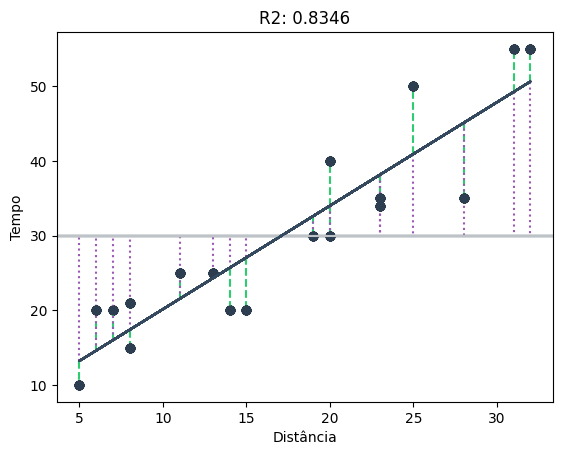

In [36]:
## Plot a Graph comparing estimation with real values, should the errors distance. 
## Helps to understand the R² concept.

y = df['tempo']
yhat = df['yhat']
x = df['distancia']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(model.rsquared,4)))
    plt.xlabel("Distância")
    plt.ylabel("Tempo")
plt.show()

In [37]:
## Manual calculation of R²

R2 = ((df['yhat']-
       df['tempo'].mean())**2).sum()/(((df['yhat']-
                                        df['tempo'].mean())**2).sum()+
                                        (df['errors']**2).sum())

round(R2,4)



0.8346

In [38]:
## Demonstrating that the (R²) is the Pearson Correlation Squared

## Person Correlation
df[['tempo','distancia']].corr()

#R²
(df[['tempo','distancia']].corr())**2

,tempo,distancia
tempo,1.000000,0.834583
distancia,0.834583,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

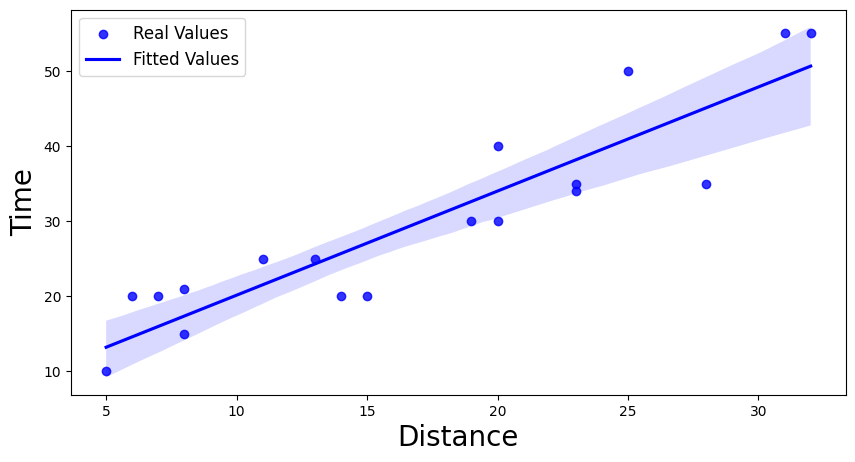

In [39]:
#Plotting the model with 95% of Confidence Interval

plt.figure(figsize=(10,5))
sns.regplot(data=df, x='distancia', y='tempo', ci=95, color='blue')
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.legend(['Real Values', 'Fitted Values'], fontsize=12)
plt.show

In [40]:
## Showing the CI data at 95% 

model.conf_int(alpha=0.05)

,0,1
Intercept,0.046843,12.531860
distancia,1.058740,1.712634


In [41]:
## Making a prediction

p_dist = 20
predicted = model.predict(pd.DataFrame({'distancia':[p_dist]}))

print("The time to make",p_dist,"is",predicted[0])

The time to make 20 is 34.00309650782728
